In [1]:
import os
import sys
import pandas as pd
import numpy as np

# Create Spark context
from pyspark import SparkContext, SparkConf
from pyspark.sql import functions as F
from pyspark.sql.types import *
conf = SparkConf().setAppName('dj').setMaster('local[*]')\
    .set("spark.memory.offHeap.enabled","true") \
    .set("spark.memory.offHeap.size","2g")
sc = SparkContext(conf=conf)

# Create Spark session
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('dj').getOrCreate()
spark

In [2]:
# Return spark version
print(spark.version)

# Return python version
import sys
print(sys.version_info,sys.version)

3.5.0
sys.version_info(major=3, minor=11, micro=6, releaselevel='final', serial=0) 3.11.6 (tags/v3.11.6:8b6ee5b, Oct  2 2023, 14:57:12) [MSC v.1935 64 bit (AMD64)]


In [3]:
df = spark.read.csv('./2017_StPaul_MN_Real_Estate.csv', header=True)    
print(df.columns)

['No.', 'MLSID', 'StreetNumberNumeric', 'streetaddress', 'STREETNAME', 'PostalCode', 'StateOrProvince', 'City', 'SalesClosePrice', 'LISTDATE', 'LISTPRICE', 'LISTTYPE', 'OriginalListPrice', 'PricePerTSFT', 'FOUNDATIONSIZE', 'FENCE', 'MapLetter', 'LotSizeDimensions', 'SchoolDistrictNumber', 'DAYSONMARKET', 'offmarketdate', 'Fireplaces', 'RoomArea4', 'roomtype', 'ROOF', 'RoomFloor4', 'PotentialShortSale', 'PoolDescription', 'PDOM', 'GarageDescription', 'SQFTABOVEGROUND', 'Taxes', 'RoomFloor1', 'RoomArea1', 'TAXWITHASSESSMENTS', 'TAXYEAR', 'LivingArea', 'UNITNUMBER', 'YEARBUILT', 'ZONING', 'STYLE', 'ACRES', 'CoolingDescription', 'APPLIANCES', 'backonmarketdate', 'ROOMFAMILYCHAR', 'RoomArea3', 'EXTERIOR', 'RoomFloor3', 'RoomFloor2', 'RoomArea2', 'DiningRoomDescription', 'BASEMENT', 'BathsFull', 'BathsHalf', 'BATHQUARTER', 'BATHSTHREEQUARTER', 'Class', 'BATHSTOTAL', 'BATHDESC', 'RoomArea5', 'RoomFloor5', 'RoomArea6', 'RoomFloor6', 'RoomArea7', 'RoomFloor7', 'RoomArea8', 'RoomFloor8', 'Bedroo

In [4]:
# Select our dependent variable
Y_df = df.select(['SALESCLOSEPRICE'])

# Display summary statistics
Y_df.describe().show()

+-------+------------------+
|summary|   SALESCLOSEPRICE|
+-------+------------------+
|  count|              5000|
|   mean|       262804.4668|
| stddev|140559.82591998563|
|    min|            100000|
|    max|             99900|
+-------+------------------+



In [5]:
def check_load(df, num_records, num_columns):
  # Takes a dataframe and compares record and column counts to input
  # Message to return if the critera below aren't met
  message = 'Validation Failed'
  # Check number of records
  if num_records == df.count():
    # Check number of columns
    if num_columns == len(df.columns):
      # Success message
      message = 'Validation Passed'
  return message

# Print the data validation message
print(check_load(df, 5000, 74))


Validation Passed


In [6]:
validation_dict = {'ASSESSMENTPENDING': 'string',
 'AssessedValuation': 'double',
 'AssociationFee': 'bigint',
 'AssumableMortgage': 'string',
 'SQFTBELOWGROUND': 'bigint'}
for col_name in validation_dict.keys():
  df = df.withColumn(col_name, F.col(col_name).cast(validation_dict[col_name]))
  

In [7]:
# create list of actual dtypes to check
actual_dtypes_list = df.dtypes
print(actual_dtypes_list)

# Iterate through the list of actual dtypes tuples
for attribute_tuple in actual_dtypes_list:
  
  # Check if column name is dictionary of expected dtypes
  col_name = attribute_tuple[0]
  if col_name in validation_dict.keys():

    # Compare attribute types
    col_type = attribute_tuple[1]
    if col_type == validation_dict[col_name]:
      print(col_name + ' has expected dtype.')

[('No.', 'string'), ('MLSID', 'string'), ('StreetNumberNumeric', 'string'), ('streetaddress', 'string'), ('STREETNAME', 'string'), ('PostalCode', 'string'), ('StateOrProvince', 'string'), ('City', 'string'), ('SalesClosePrice', 'string'), ('LISTDATE', 'string'), ('LISTPRICE', 'string'), ('LISTTYPE', 'string'), ('OriginalListPrice', 'string'), ('PricePerTSFT', 'string'), ('FOUNDATIONSIZE', 'string'), ('FENCE', 'string'), ('MapLetter', 'string'), ('LotSizeDimensions', 'string'), ('SchoolDistrictNumber', 'string'), ('DAYSONMARKET', 'string'), ('offmarketdate', 'string'), ('Fireplaces', 'string'), ('RoomArea4', 'string'), ('roomtype', 'string'), ('ROOF', 'string'), ('RoomFloor4', 'string'), ('PotentialShortSale', 'string'), ('PoolDescription', 'string'), ('PDOM', 'string'), ('GarageDescription', 'string'), ('SQFTABOVEGROUND', 'string'), ('Taxes', 'string'), ('RoomFloor1', 'string'), ('RoomArea1', 'string'), ('TAXWITHASSESSMENTS', 'string'), ('TAXYEAR', 'string'), ('LivingArea', 'string'), 

In [8]:
columns =['FOUNDATIONSIZE',
 'DAYSONMARKET',
 'FIREPLACES',
 'PDOM',
 'SQFTABOVEGROUND',
 'TAXES',
 'TAXWITHASSESSMENTS',
 'TAXYEAR',
 'LIVINGAREA',
 'YEARBUILT',
 'ACRES',
 'BACKONMARKETDATE',
 'BATHSFULL',
 'BATHSHALF',
 'BATHQUARTER',
 'BATHSTHREEQUARTER',
 'BATHSTOTAL',
 'BEDROOMS',
 'SQFTBELOWGROUND',
 'ASSOCIATIONFEE',
 'ASSESSEDVALUATION']

In [9]:
df.select(*columns).printSchema()

root
 |-- FOUNDATIONSIZE: string (nullable = true)
 |-- DAYSONMARKET: string (nullable = true)
 |-- FIREPLACES: string (nullable = true)
 |-- PDOM: string (nullable = true)
 |-- SQFTABOVEGROUND: string (nullable = true)
 |-- TAXES: string (nullable = true)
 |-- TAXWITHASSESSMENTS: string (nullable = true)
 |-- TAXYEAR: string (nullable = true)
 |-- LIVINGAREA: string (nullable = true)
 |-- YEARBUILT: string (nullable = true)
 |-- ACRES: string (nullable = true)
 |-- BACKONMARKETDATE: string (nullable = true)
 |-- BATHSFULL: string (nullable = true)
 |-- BATHSHALF: string (nullable = true)
 |-- BATHQUARTER: string (nullable = true)
 |-- BATHSTHREEQUARTER: string (nullable = true)
 |-- BATHSTOTAL: string (nullable = true)
 |-- BEDROOMS: string (nullable = true)
 |-- SQFTBELOWGROUND: long (nullable = true)
 |-- ASSOCIATIONFEE: long (nullable = true)
 |-- ASSESSEDVALUATION: double (nullable = true)



In [10]:
df = df.withColumn('SALESCLOSEPRICE', F.col('SALESCLOSEPRICE').cast('double'))

In [11]:
for col in columns:
  df = df.withColumn(col, F.col(col).cast('double'))

In [12]:
df.corr('ASSOCIATIONFEE', 'SALESCLOSEPRICE')

0.08171349046350876

In [13]:
# Name and value of col with max corr
corr_max = 0
corr_max_col = columns[0]

# Loop to check all columns contained in list
for col in columns:
    try:
        # Check the correlation of a pair of columns
        corr_val = df.corr(col, 'SALESCLOSEPRICE')
    except: 
        # If error, skip to next column
        print(col)
        continue
    # Logic to compare corr_max with current corr_val
    if corr_val > corr_max:
        # Update the column name and corr value
        corr_max = corr_val
        corr_max_col = col

print(corr_max_col, corr_max)

LIVINGAREA 0.8162701823275637


In [18]:
# Select a single column and sample and convert to pandas
sample_df = df.select(['LISTPRICE']).sample(False, 0.5, 42)
pandas_df = sample_df.toPandas()
# Import skewness function
from pyspark.sql.functions import skewness

# Compute and print skewness of LISTPRICE
print(df.agg({'LISTPRICE': 'skewness'}).collect())

[Row(skewness(LISTPRICE)=2.790448093916559)]


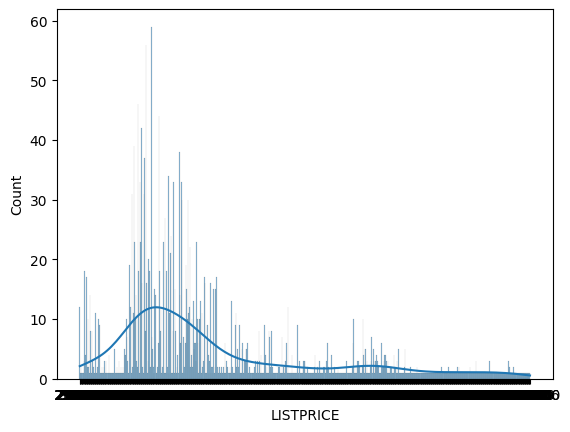

In [19]:


import seaborn as sns
import matplotlib.pyplot as plt
# Plot distribution of pandas_df and display plot
sns.histplot(pandas_df, x='LISTPRICE', kde=True)
plt.show()



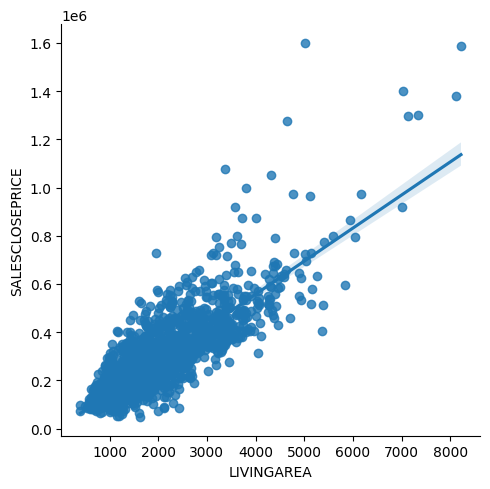

In [16]:
# Select a the relevant columns and sample
sample_df = df\
    .select(['SALESCLOSEPRICE', 'LIVINGAREA'])\
    .sample(False, 0.5, 42)

# Convert to pandas dataframe
pandas_df = sample_df.toPandas()

# Linear model plot of pandas_df
sns.lmplot(x='LIVINGAREA', y='SALESCLOSEPRICE', data=pandas_df)
plt.show()